In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Bachelor's%20Degree%20Majors%20by%20Age%2C%20Sex%2C%20and%20State/Bachelor_Degree_Majors.csv")

In [3]:
df.head()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Alabama,Total,25 and older,"885,357","263,555","98,445","210,147","141,071","172,139"
1,Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953"
2,Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848"
3,Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338"
4,Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   State                                   612 non-null    object
 1   Sex                                     612 non-null    object
 2   Age Group                               612 non-null    object
 3   Bachelor's Degree Holders               612 non-null    object
 4   Science and Engineering                 612 non-null    object
 5   Science and Engineering Related Fields  612 non-null    object
 6   Business                                612 non-null    object
 7   Education                               612 non-null    object
 8   Arts, Humanities and Others             612 non-null    object
dtypes: object(9)
memory usage: 43.2+ KB


In [5]:
df.isnull().sum()

State                                     0
Sex                                       0
Age Group                                 0
Bachelor's Degree Holders                 0
Science and Engineering                   0
Science and Engineering Related Fields    0
Business                                  0
Education                                 0
Arts, Humanities and Others               0
dtype: int64

In [6]:
df = df[df["Age Group"] != "25 and older"]

In [7]:
df = df[df["Sex"] != "Total"]

In [8]:
df.head()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
5,Alabama,Male,25 to 39,"117,794","50,188","7,712","29,859","6,357","23,678"
6,Alabama,Male,40 to 64,"184,328","67,977","12,331","54,931","12,820","36,269"
7,Alabama,Male,65 and older,"103,496","41,201","5,961","29,119","10,313","16,902"
9,Alabama,Female,25 to 39,"151,130","40,548","24,666","28,656","22,985","34,275"
10,Alabama,Female,40 to 64,"234,152","47,785","34,393","57,340","51,055","43,579"


In [9]:
def process_data(data):
    data = data.split(",")
    data = "".join(data)
    return int(data)
columns = df.columns
columns = columns[3:]
columns

Index(['Bachelor's Degree Holders', 'Science and Engineering',
       'Science and Engineering Related Fields', 'Business', 'Education',
       'Arts, Humanities and Others'],
      dtype='object')

In [10]:
for col in columns:
    df[col] = df[col].apply(process_data)
df.head()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
5,Alabama,Male,25 to 39,117794,50188,7712,29859,6357,23678
6,Alabama,Male,40 to 64,184328,67977,12331,54931,12820,36269
7,Alabama,Male,65 and older,103496,41201,5961,29119,10313,16902
9,Alabama,Female,25 to 39,151130,40548,24666,28656,22985,34275
10,Alabama,Female,40 to 64,234152,47785,34393,57340,51055,43579


<AxesSubplot:xlabel='Age Group', ylabel='count'>

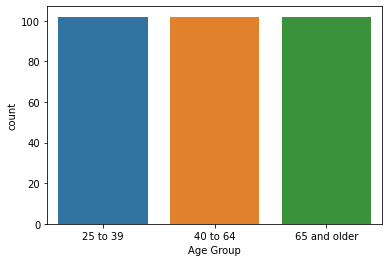

In [11]:
sns.countplot(x="Age Group", data=df)

<AxesSubplot:xlabel='count', ylabel='Sex'>

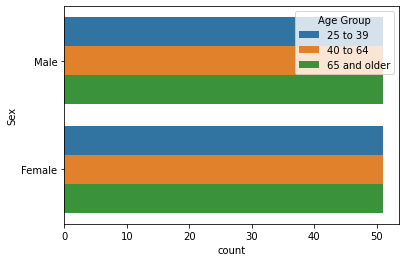

In [12]:
sns.countplot(y="Sex", hue="Age Group", data=df)

In [13]:
df.groupby(['State']).sum().style.background_gradient(cmap='Blues').set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2px solid darkblue')]}])

,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
State,,,,,,
Alabama,885357,263555,98445,210147,141071,172139
Alaska,146157,57375,14226,22507,17283,34766
Arizona,1492158,512718,151885,312503,197335,317717
Arkansas,475367,139003,54503,100020,86256,95585
California,9428484,3929561,781396,1721094,580366,2416067
Colorado,1695602,662836,143362,347333,148597,393474
Connecticut,994548,361107,88471,196631,101676,246663
Delaware,228199,75623,23007,46817,29708,53044
District of Columbia,301429,146209,15612,39114,10251,90243


In [14]:
df.groupby(['State','Age Group', "Sex"]).sum().style.background_gradient(cmap='Blues').set_table_styles([{'selector' : '',
                            'props' : [('border',
                                        '2px solid darkblue')]}])

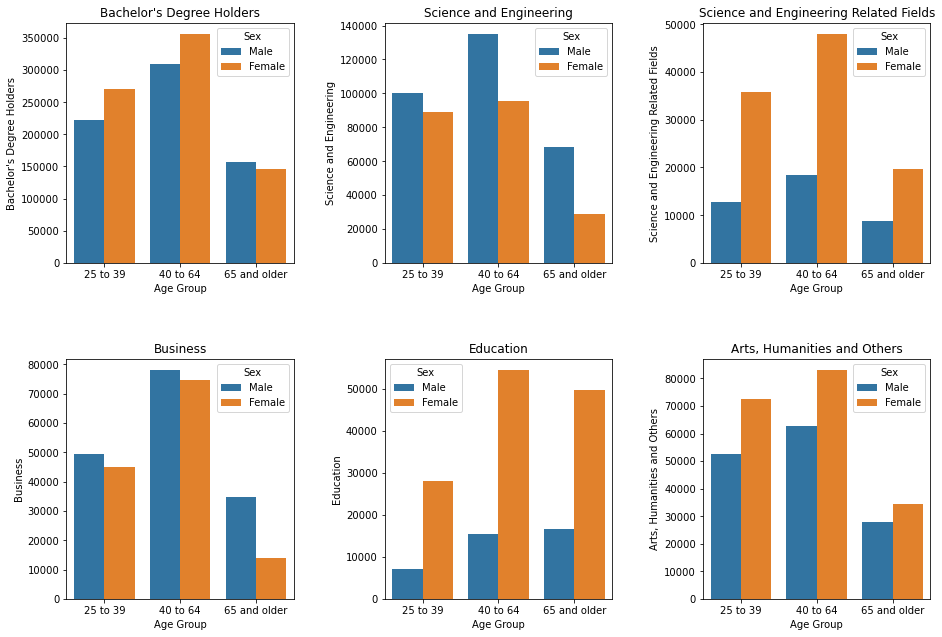

In [15]:
i=1
plt.figure(figsize=(15,10))
for col in columns:
    
    plt.subplot(2,3,i)
    sns.barplot(x="Age Group", y=col, hue="Sex", data=df, ci=False);
    plt.title(col)
    i+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()